# ResNet-18 (Residual Network) Model

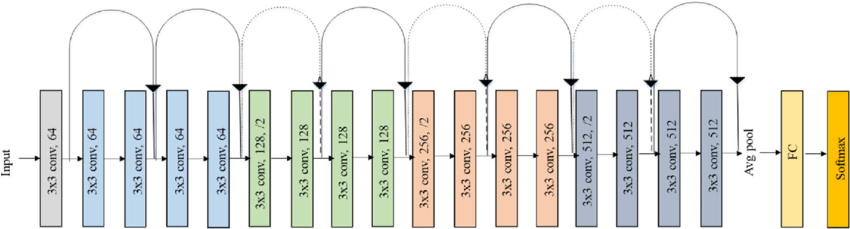

**Transfer Learning** is a process of training model using our data a trained model (usually from big dataset like ImageNet).
- The base model (also called the backbone) is kept as-is to reuse its learned features.
- The task-specific (head) layer — usually the final classification layer — is removed and replaced with a new one that matches your own task (e.g., 10 classes instead of 1000).
- **Freezing Parameters**: Only the final layers (e.g., classifier head) are trainable, while the rest of the model (filters/weights in earlier layers) are **frozen**:
  - Faster training: No Gradient Calculation for frozen layers.
  - Risk of overfitting when the train data is small
  - Limited adaptability, because frozen feature extractor not fully capture important domain-specific features in dataset that different from the original.

**Why Use It?**
- Training a deep model from scratch needs:
  - A massive labeled dataset (e.g., millions of images)
  -Lots of compute (GPUs for days)
- But with transfer learning, you:
  - Start with a model already trained on general features
  - Adapt (fine-tune) it to your specific task

**Classification**
- Feature Extraction Layer = CNN
- Task Layer = Fully Connected Layer or Linear Layer

In [ ]:
# Import Library
# Future Compability with Python 2/3
from __future__ import print_function, division

# PyTorch Core
import torch                          # Core PyTorch Library
import torch.nn as nn                 # Neural Network
import torch.optim as optim           # Optimizers (SGD, Adam)
from torch.autograd import Variable   # Wrapping Tensor with Gradient Tracking

# TorchVision
import torchvision                                     # High-Level PyToch Vision Library
from torchvision import datasets, models, transforms   # Datasets, Pretrained Models, Transforms

# Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Utility Libraries
import time             # Timing Training Loops
import os               # File and Folder Handling
import numpy as np      # Matrix Operations, Image Arrays, etc.

# External Image Handling
from skimage import io  # Read/Write images (debugging or manual file handling)

In [ ]:
# Load ResNet-18 Model
# IMAGENET1K_V1 -> Pretrained weights (filters) learned on ImageNet-1k dataset (1,000 classes)
model = models.resnet18(weights='IMAGENET1K_V1')
# Fully-Connected Layer
# Define a new custom output layer from 1000 (IMAGENET1K_V1)
num_ftr = model.fc.in_features
# Classify 200 classes
model.fc = nn.Linear(num_ftr, 200)

In [ ]:
# Selective Training Mode Setup
# Puts the entire model into Evaluation Mode -> Transfer Learning or Fine-Tuning
model.train(False)
# Sets only the fully connected output layer is trainable, other freeze
model.fc.train(True)

Linear(in_features=512, out_features=200, bias=True)

In [ ]:
# Download Files from Google Drive
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ------------- -------------------------- 1/3 [PySocks]
   -------------------------- ------------- 2/3 [gdown]
   -------------------------- ------------- 2/3 [gdown]
   -------------------------- ------------- 2/3 [gdown]
   -------------------------- ------------- 2/3 [gdown]
   ---------------------------------------- 3/3 [gdown]



In [6]:
!gdown --fuzzy https://drive.google.com/file/d/1XBneW9_JmaD_DmilLKDnGwqzzetJoCrj/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1XBneW9_JmaD_DmilLKDnGwqzzetJoCrj
From (redirected): https://drive.google.com/uc?id=1XBneW9_JmaD_DmilLKDnGwqzzetJoCrj&confirm=t&uuid=f3724e9f-fade-42bf-9e84-e7c980baf1a4
To: c:\03. Other\06. Training - Bootcamp\01. Rudythalib - AI for Manufacturing\CUB_200_2011.tgz

  0%|          | 0.00/1.15G [00:00<?, ?B/s]
  0%|          | 524k/1.15G [00:00<10:01, 1.91MB/s]
  0%|          | 1.05M/1.15G [00:00<11:12, 1.71MB/s]
  0%|          | 1.57M/1.15G [00:00<11:43, 1.63MB/s]
  0%|          | 2.10M/1.15G [00:01<11:05, 1.73MB/s]
  0%|          | 2.62M/1.15G [00:01<10:34, 1.81MB/s]
  0%|          | 3.15M/1.15G [00:01<09:01, 2.12MB/s]
  0%|          | 3.67M/1.15G [00:01<08:04, 2.37MB/s]
  0%|          | 4.19M/1.15G [00:01<07:19, 2.61MB/s]
  0%|          | 4.72M/1.15G [00:02<06:52, 2.78MB/s]
  0%|          | 5.24M/1.15G [00:02<06:35, 2.89MB/s]
  1%|          | 5.77M/1.15G [00:02<06:31, 2.92MB/s]
  1%|          | 6.29M/1.15G [00:02<06:09, 3

In [20]:
# Extract a compressed .tgz archive file
# Caltech-UCSD Birds 200 classes, version 2011
# 200 bird species, with over 11,000 labeled images
!tar -xf ./CUB_200_2011.tgz

CUB_200_2011/train_test_split.txt: Can't unlink already-existing object: Permission denied
CUB_200_2011/classes.txt: Can't unlink already-existing object: Permission denied
tar: Error exit delayed from previous errors.


In [51]:
# Read Split File
read_line = open('C:\\03. Other\\06. Training - Bootcamp\\01. Rudythalib - AI for Manufacturing\\CUB_200_2011\\train_test_split.txt')
a = read_line.readlines()

# Read Class Names
classes = open('C:\\03. Other\\06. Training - Bootcamp\\01. Rudythalib - AI for Manufacturing\\CUB_200_2011\\classes.txt')
c_names = classes.readlines()

# Extract Class Names Only
for i in range(len(c_names)):
    c_names[i] = c_names[i].split(' ')[1].strip()

# Create test class folders
for i in range(len(c_names)):
    os.makedirs(
        'C:\\03. Other\\06. Training - Bootcamp\\01. Rudythalib - AI for Manufacturing\\CUB_200_2011\\test\\'+c_names[i],
        exist_ok=True # Prevent crash if folder exists
        )

# Load Dataset
train_dataset = datasets.ImageFolder('C:\\03. Other\\06. Training - Bootcamp\\01. Rudythalib - AI for Manufacturing\\CUB_200_2011\\images')

# Move test images into their own folder
# Loop Through All Images
for j in range(len(train_dataset.imgs)):
    # Verify the Image is in Test Set
    if(a[j].split(' ')[1].strip() == '0'):
        # Get the image path and load it
        path = train_dataset.imgs[j][0]
        img = io.imread(path)
        # Get folder (class name) and image name
        folder = path.split('\\')[6]
        img_name = path.split('\\')[7]
        # Save the image to test folder
        save_path = os.path.join(
            'C:\\03. Other\\06. Training - Bootcamp\\01. Rudythalib - AI for Manufacturing\\CUB_200_2011\\test',
            folder, img_name
        )
        
        io.imsave(save_path,img)
        os.remove(path)

In [50]:
import shutil

# Create the train folder
os.makedirs('C:\\03. Other\\06. Training - Bootcamp\\01. Rudythalib - AI for Manufacturing\\CUB_200_2011\\train', exist_ok=True)

# Copy everything from images to train
shutil.copytree(
    'C:\\03. Other\\06. Training - Bootcamp\\01. Rudythalib - AI for Manufacturing\\CUB_200_2011\\images',
    'C:\\03. Other\\06. Training - Bootcamp\\01. Rudythalib - AI for Manufacturing\\CUB_200_2011\\train',
    dirs_exist_ok=True  # allow overwrite if train already exists
)

'C:\\03. Other\\06. Training - Bootcamp\\01. Rudythalib - AI for Manufacturing\\CUB_200_2011\\train'

In [ ]:
# Data Transformation
# Data Augmentation = Add Random Transformation to training image -> help model to generalize
# Normalizes (channel-wise mean and std deviation) of training data to the pretrained models to ImageNet
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),                       # Resize shorter shide to 256 pixel
        transforms.RandomRotation(45),                # Randomly rotate image up to +-45o
        transforms.RandomResizedCrop(224),            # Random crop (then resize) to 224x224 pixels
        transforms.RandomHorizontalFlip(),            # Randomly flip image horizontally
        transforms.ToTensor(),                        # Convert image (0-255) to tensor (0-1)
        transforms.Normalize([0.485, 0.456, 0.406],   # Mean for each channel (RGB)
                             [0.229, 0.224, 0.225])   # Standard Deviation
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),                       # Resize shorter side to 256 pixel
        transforms.CenterCrop(224),                   # Random crop (then resize) to 224x224 pixels
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], 
                             [0.229, 0.224, 0.225])
    ]),
}

# Data Directory
data_dir = 'C:\\03. Other\\06. Training - Bootcamp\\01. Rudythalib - AI for Manufacturing\\CUB_200_2011\\'

# Loading Datasets with PyTorch ImageFolder
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'test']}

# Define Data Loaders to Load Data using image_datasets and transforms
# Batch Size processing to Mini-Batches
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size = 8, shuffle=True, num_workers = 4)
               for x in ['train', 'test']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()

In [58]:
print(dataset_sizes)

{'train': 5994, 'test': 8719}


In [57]:
!mkdir Bird

In [72]:
def train_model(model, criterion, optimizer, num_epoch=10):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epoch):
        print('Epoch {}/{}'.format(epoch, num_epoch - 1))
        print('-' * 10)

        # Each Epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                # scheduler.step()
                model.train(True)         # Set model to training mode
            else:
                model.train(False)        # Set model to evaluate mode

            running_loss = 0.0
            running_correct = 0

            # Iterate over batches
            for inputs, labels in dataloaders[phase]:
                # Move data to GPU (if available)
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                
                # Zero the Gradients
                optimizer.zero_grad()

                # Forward Pass
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # Backward + Optimize (Only in Training Phase)
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                
                # Accumulate loss and accuracy
                running_loss += loss.item() * inputs.size(0)
                running_correct += torch.sum(preds == labels.data)
            
            # Epoch-level Loss and Accuracy
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_correct.float() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # Save Best Model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
                
                state = {
                    'model':model.state_dict(), 
                    'optim':optimizer_ft.state_dict()
                }
                
                save_path = 'data_dir\\Bird\\point_resnet_best.pth'
                os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Ensure folder exists
                torch.save(state, save_path)

        
        print()

    # Done Training
    time_elapsed = time.time() - since
    print('Training Complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60)
    )
    print('Best Test Acc: {:4f}'.format(best_acc))
    
    # Load Best Model Weights
    model.load_state_dict(best_model_wts)
    return model

In [73]:
if use_gpu:
    model = model.cuda()
# model_ft = model_ft.float()

# Loss Function
criterion = nn.CrossEntropyLoss()

# Observe All Parameters being Optimized
optimizer_ft = optim.Adam(model.parameters(), lr=0.0001)

In [74]:
model = train_model(model, criterion, optimizer_ft, num_epoch=50)

Epoch 0/49
----------
train Loss: 3.4758 Acc: 0.2439
test Loss: 2.0386 Acc: 0.5024

Epoch 1/49
----------
train Loss: 2.8713 Acc: 0.3675
test Loss: 1.6938 Acc: 0.5372

Epoch 2/49
----------
train Loss: 2.4724 Acc: 0.4373
test Loss: 1.3370 Acc: 0.6306

Epoch 3/49
----------
train Loss: 2.2084 Acc: 0.4960
test Loss: 1.2338 Acc: 0.6649

Epoch 4/49
----------
train Loss: 2.0431 Acc: 0.5317
test Loss: 1.1949 Acc: 0.6693

Epoch 5/49
----------
train Loss: 1.9040 Acc: 0.5526
test Loss: 1.1035 Acc: 0.6919

Epoch 6/49
----------
train Loss: 1.7502 Acc: 0.5861
test Loss: 0.9866 Acc: 0.7220

Epoch 7/49
----------
train Loss: 1.6827 Acc: 0.6003
test Loss: 0.9264 Acc: 0.7344

Epoch 8/49
----------
train Loss: 1.5939 Acc: 0.6200
test Loss: 0.9400 Acc: 0.7376

Epoch 9/49
----------
train Loss: 1.5224 Acc: 0.6370
test Loss: 0.8923 Acc: 0.7528

Epoch 10/49
----------
train Loss: 1.4564 Acc: 0.6483
test Loss: 0.9061 Acc: 0.7491

Epoch 11/49
----------
train Loss: 1.3882 Acc: 0.6585
test Loss: 0.8458 Acc

In [79]:
device = 'cuda' if use_gpu else 'cpu'

# Evaluation Metric Function
def calculate_metrics(model, dataloader):
    model.eval()
    predicted_labels = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            predicted_labels.extend(predicted.tolist())
            true_labels.extend(labels.tolist())

    precision = precision_score(true_labels, predicted_labels, average="macro")
    recall = recall_score(true_labels, predicted_labels, average="macro")
    f1 = f1_score(true_labels, predicted_labels, average="macro")

    return precision, recall, f1

# Calculate metrics on Test set
precision, recall, f1 = calculate_metrics(model, dataloaders['test'])
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.8041
Recall: 0.7834
F1 Score: 0.7855
